# Pymaceuticals Inc.
---

### Analysis
 
 1. There's data about 249 unique mice.
 2. About 51% of the data belongs to Male mice, 49% to female mice
 3. There's strong correlation(0.84 closer to 1) between weight and average tumor volume of the mice, higher the weight, greater the tumor volume
 4. Among mice, on Capomulin the tumor volume has come down over time.
 5. Tumor volume data for regimens ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin') is normally distributed, there weren't many outliers.

In [304]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how='inner', on = 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [305]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [306]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_by = combined_df[['Mouse ID','Timepoint']].groupby(['Mouse ID','Timepoint']).size()
grouped_by = grouped_by.index[grouped_by.gt(1)].tolist()
duplicate_ids = {x[0] for x in grouped_by}
duplicate_ids

{'g989'}

In [307]:
# Optional: Get all the data for the duplicate mouse ID. 
# df['Region'].isin(['West', 'East'])
data_with_duplicates = combined_df[combined_df['Mouse ID'].isin(['g989'])]
data_with_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [308]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df['Mouse ID'] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [309]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [164]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_by_drug_regimen = cleaned_df.groupby('Drug Regimen')
mean_tumor_volume = grouped_by_drug_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_by_drug_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_by_drug_regimen['Tumor Volume (mm3)'].var()
standared_deviation_tumor_volume = grouped_by_drug_regimen['Tumor Volume (mm3)'].std()
standard_error_mean_tumor_volume = grouped_by_drug_regimen['Tumor Volume (mm3)'].sem()
statistics_df = pd.DataFrame({'Mean Tumor Volume' : mean_tumor_volume,
                             'Median Tumor Volume' : median_tumor_volume,
                             'Variance Tumor Volume' : variance_tumor_volume,
                             'Standared Deviation Tumor Volume' : standared_deviation_tumor_volume,
                             'Standard Error Mean Tumor Volume' : standard_error_mean_tumor_volume})
statistics_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standared Deviation Tumor Volume,Standard Error Mean Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [316]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
grouped_by_drug_regimen = cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
grouped_by_drug_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [317]:
count_of_specimens_for_each_drug = cleaned_df.groupby('Drug Regimen')['Mouse ID'].count()
count_of_specimens_for_each_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

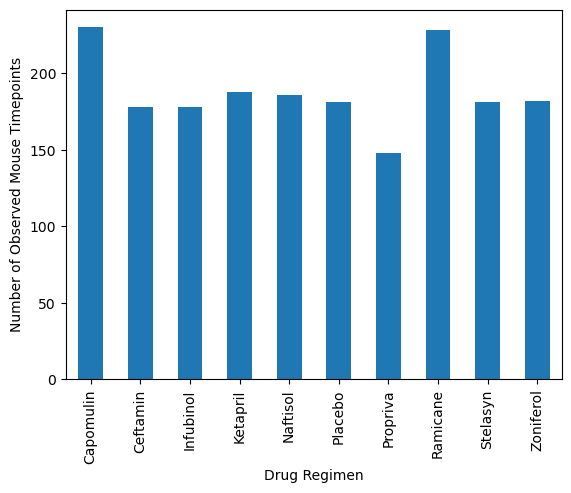

In [169]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_of_specimens_for_each_drug.plot(kind="bar", xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints')

# show the graph
plt.show()

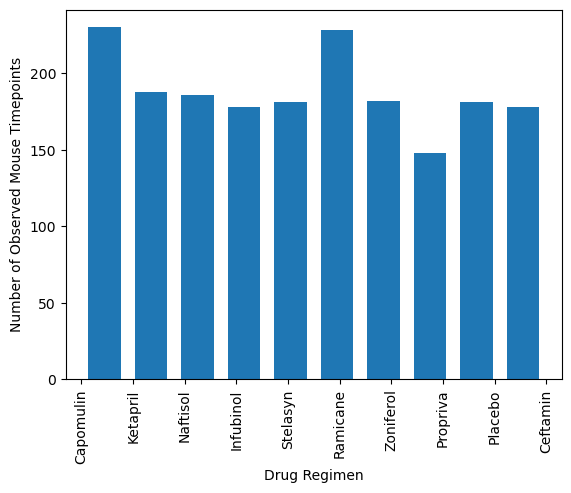

In [170]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.hist(cleaned_df['Drug Regimen'], alpha=1, rwidth=0.7)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.show()

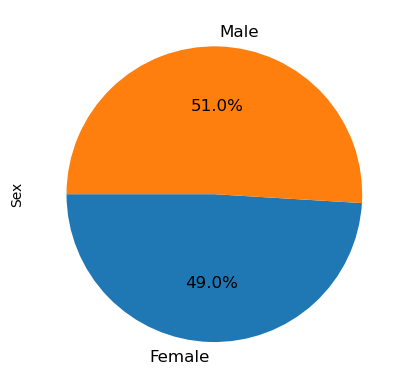

In [294]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_of_male_female_mice = cleaned_df.groupby('Sex')['Mouse ID'].count()
count_of_male_female_mice.plot(kind='pie', autopct='%1.1f%%', startangle=180, ylabel='Sex', fontsize=12)
plt.show()

In [300]:
count_of_male_female_mice

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

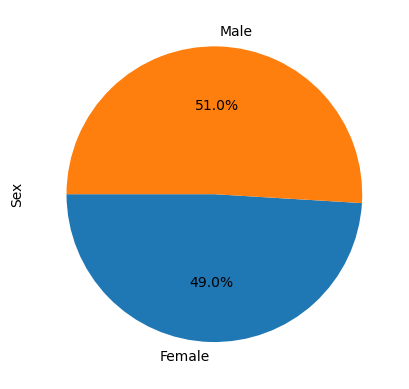

In [303]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie([922, 958], labels=['Female', 'Male'], autopct="%1.1f%%", startangle=180)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [318]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_value_for_each_mice = cleaned_df.loc[cleaned_df.groupby(['Mouse ID'])['Timepoint'].idxmax()]
reduced_df = max_timepoint_value_for_each_mice[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]
renamed_df = reduced_df.rename(columns = {'Tumor Volume (mm3)':'Final Tumor volume'})
renamed_df.reset_index(drop=True, inplace=True) 
renamed_df.set_index('Mouse ID')

,Final Tumor volume,Drug Regimen
Mouse ID,,
a203,67.973419,Infubinol
a251,65.525743,Infubinol
a262,70.717621,Placebo
a275,62.999356,Ceftamin
a366,63.440686,Stelasyn
...,...,...
z435,48.710661,Propriva
z578,30.638696,Ramicane
z581,62.754451,Infubinol


In [319]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = renamed_df[renamed_df['Drug Regimen'] == treatment]['Final Tumor volume']
    
    # add subset
    tumor_volumes.append(final_tumor_volumes.tolist())

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers =  final_tumor_volumes[((final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound))]
    print(f'Outliers for {treatment} are', outliers)

Outliers for Capomulin are Series([], Name: Final Tumor volume, dtype: float64)
Outliers for Ramicane are Series([], Name: Final Tumor volume, dtype: float64)
Outliers for Infubinol are 31    36.321346
Name: Final Tumor volume, dtype: float64
Outliers for Ceftamin are Series([], Name: Final Tumor volume, dtype: float64)


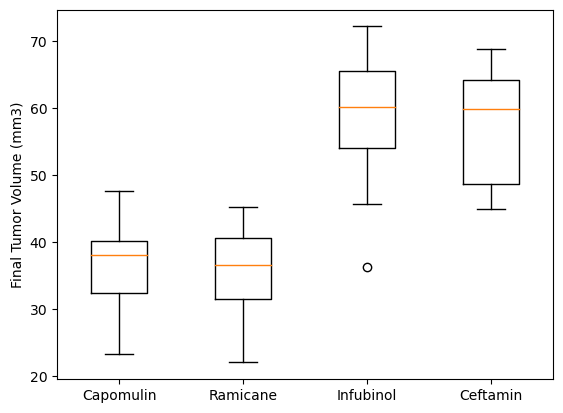

In [329]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(tumor_volumes, labels=treatments)
plt.show()

## Line and Scatter Plots

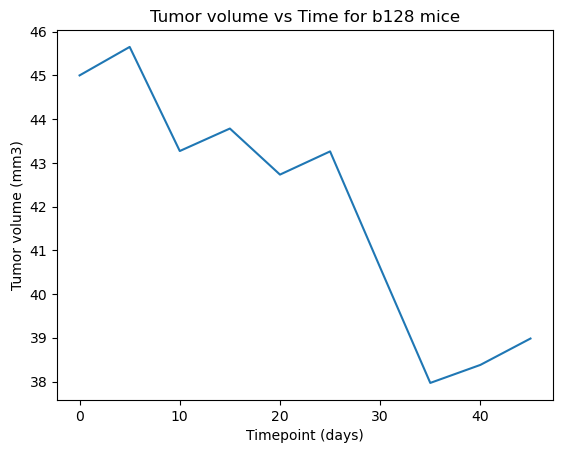

In [323]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = cleaned_df[cleaned_df['Mouse ID'] == 'b128']
plt.plot(single_mouse_data['Timepoint'],single_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor volume vs Time for b128 mice')
plt.show()

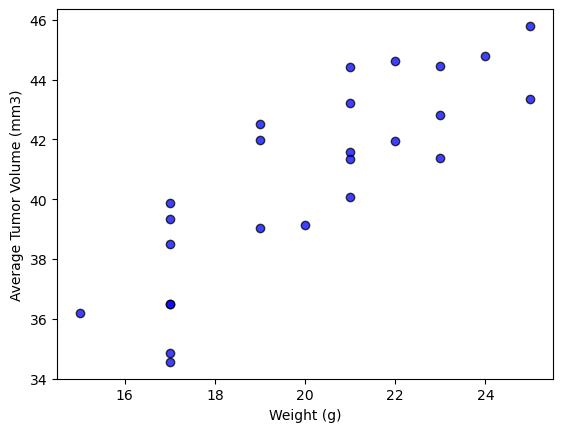

In [324]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin'][['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']].groupby('Mouse ID').mean()
average_tumor_volume = average_tumor_volume_df['Tumor Volume (mm3)']
weight = average_tumor_volume_df['Weight (g)']
plt.scatter(weight, average_tumor_volume, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume is, there is strong positive correlation : 0.84


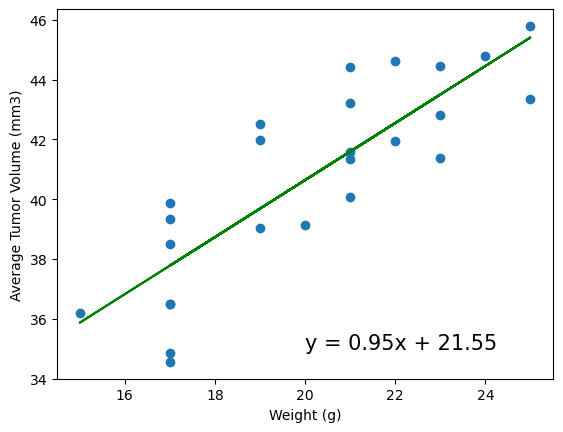

In [325]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_tumor_volume, weight)
print(f'The correlation between weight and average tumor volume is, there is strong positive correlation : {round(correlation[0], 2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(weight, average_tumor_volume)
plt.plot(weight, regress_values,"g-")
plt.annotate(line_eq, (20,35), fontsize=15, color="black")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()